In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv('data/Lionel Messi Goals.csv')
data.head()

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,samedi 16 f�vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,samedi 22 d�cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


In [57]:
df = data['Goal Type'].value_counts().reset_index()
df

,index,Goal Type
0,Field goal,155
1,Penalty,82
2,Free kick,44
3,Rebound,37
4,Solo run,22


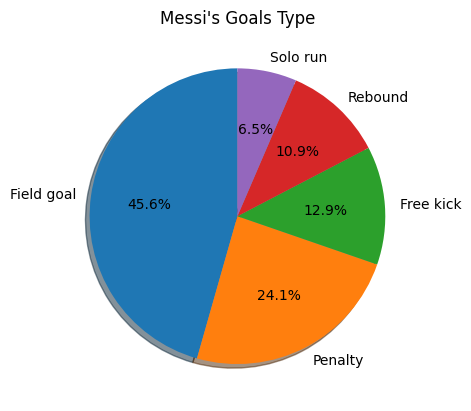

In [58]:
plt.pie(df['Goal Type'], labels=df['index'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Messi's Goals Type")
plt.show()

In [59]:
df = data['Goal Method'].value_counts().reset_index()
df

,index,Goal Method
0,Left foot,538
1,Right foot,86
2,Head,24
3,Hand,1
4,Hip,1
5,Chest,1


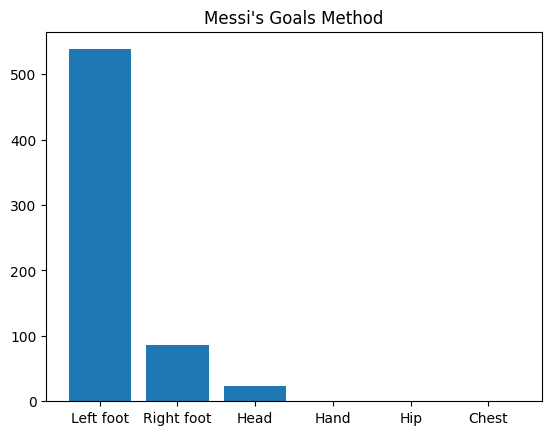

In [60]:
plt.bar(df['index'], df['Goal Method'])
plt.title("Messi's Goals Method")
plt.show()

In [61]:
data['Minute'] = data['Minute'].apply(eval).astype(int)

In [62]:
df = data['Minute'].value_counts().reset_index().sort_values(by=['index'], ascending=True)
df

,index,Minute
74,3,4
87,4,3
58,5,6
85,6,3
79,7,4
...,...,...
2,92,13
84,93,3
80,94,4
93,97,1


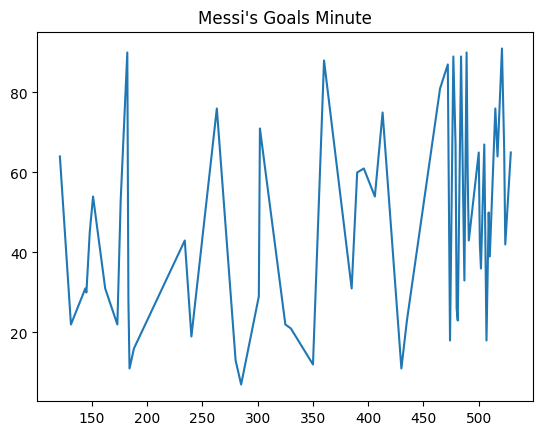

In [77]:
plt.plot(df['index'], df['Minute'])
plt.title("Messi's Goals Minute")
plt.show()

In [64]:
def extract_year(date_str):
    parts = date_str.split(' ')
    return parts[-1]

data['Date'] = data['Date'].apply(extract_year)

In [65]:
df = data.groupby('Date').size().reset_index(name='Goals')
df

,Date,Goals
0,2005,3
1,2006,12
2,2007,31
3,2008,22
4,2009,41
5,2010,60
6,2011,59
7,2012,91
8,2013,45
9,2014,58


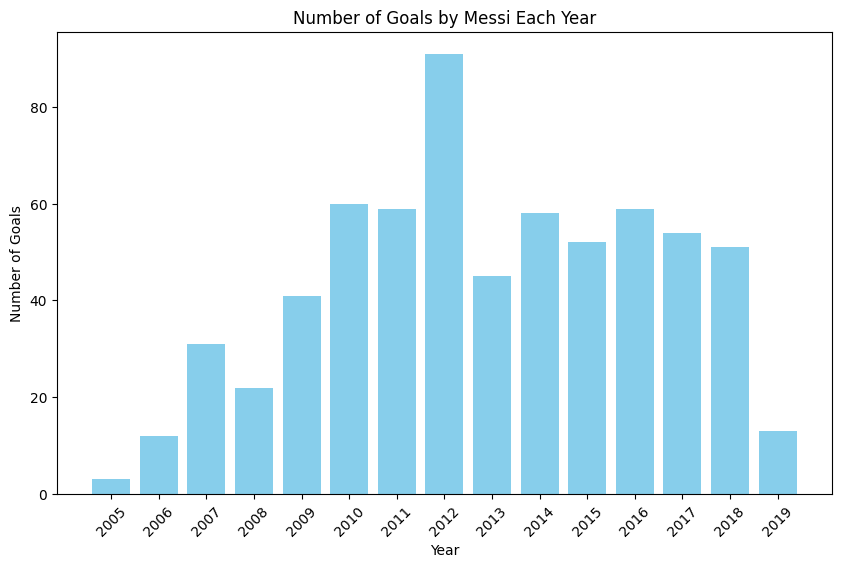

In [66]:
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Goals'], color='skyblue')
plt.title('Number of Goals by Messi Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)
plt.show()

In [67]:
penalties = data[data['Goal Type'] == 'Penalty'].copy()
penalties.loc[:, 'Preferred Foot'] = penalties['Goal Method'].apply(lambda x: 'Left' if 'Left' in x else 'Right')

In [68]:
df = penalties.groupby('Preferred Foot').size().reset_index(name='Count')
df.loc[1]=['Right',0]
df

,Preferred Foot,Count
0,Left,82
1,Right,0


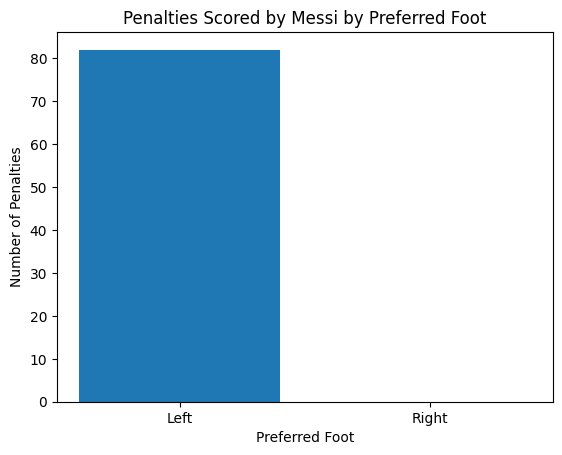

In [69]:
plt.bar(df['Preferred Foot'], df['Count'])
plt.title('Penalties Scored by Messi by Preferred Foot')
plt.xlabel('Preferred Foot')
plt.ylabel('Number of Penalties')
plt.show()

In [70]:
goal_in_overtime = data[data['Minute']>90].reset_index()

In [71]:
df = goal_in_overtime.groupby('Final Game Result').size().reset_index(name='Count')
df

,Final Game Result,Count
0,Draw,1
1,Lost,2
2,Won,27


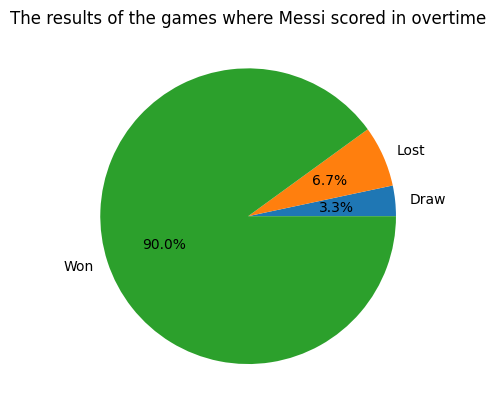

In [72]:
plt.pie(df['Count'], labels=df['Final Game Result'], autopct='%1.1f%%' )
plt.title('The results of the games where Messi scored in overtime')
plt.show()

In [73]:
df = data[data['Score Away Team - When Messi Scored'] == data['Score Home Team - When Messi Scored']].reset_index()
df.head()

,index,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,121,2019,Liga,FC Barcelona,Valencia,Valencia,64,2,2,Field goal,Left foot,Draw
1,131,2017,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,22,1,1,Field goal,Left foot,Draw
2,144,2016,Liga,FC Barcelona,Sevilla,Sevilla,31,1,1,Free kick,Left foot,Won
3,145,2016,Liga,FC Barcelona,Atl�tico Madrid,Atl�tico Madrid,30,1,1,Field goal,Left foot,Won
4,148,2014,Liga,FC Barcelona,Espanyol,Espanyol,45,1,1,NaN,Left foot,Won


In [74]:
total_goals = len(data)
total_goals

651

In [75]:
draw_goals = len(df)
draw_goals

56

In [76]:
percentage_draw_goals = round((draw_goals / total_goals) * 100, 2)
print("percent of Draw goals =", "%", percentage_draw_goals)


percent of Draw goals = % 8.6
